# Task 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = np.load('Data/circle_data_1.npy')

# Transpose data and populate
points = data.T
x_points = points[:, 0]
y_points = points[:, 1]

In [3]:
# Construct the A matrix and b vector for least-squares
N = len(points)
A = np.ones((N, 3))
b = np.zeros(N)

for i in range(N):
    x = x_points[i]
    y = y_points[i]
    A[i, 1] = -2 * x
    A[i, 2] = -2 * y
    b[i] = -(x**2 + y**2)

A

array([[ 1.        ,  3.4090711 , -3.47328761],
       [ 1.        ,  2.35568754, -0.52656519],
       [ 1.        ,  1.90098938, -3.35593188],
       [ 1.        ,  2.87709198,  0.09244163],
       [ 1.        ,  3.36759511, -1.2050373 ],
       [ 1.        ,  0.89709409, -2.63991226],
       [ 1.        ,  3.9227909 , -1.64759832],
       [ 1.        ,  3.02538767, -3.52739821],
       [ 1.        ,  0.38155817, -1.69987076],
       [ 1.        ,  0.21226918, -0.4064507 ],
       [ 1.        ,  1.68901941, -3.25482101],
       [ 1.        ,  0.34872947, -4.64367774],
       [ 1.        ,  4.50884682, -0.70654184],
       [ 1.        ,  2.02902995, -0.56832271],
       [ 1.        ,  2.72199301, -2.88228222],
       [ 1.        ,  0.85789716, -3.59870762],
       [ 1.        ,  0.39146927, -0.17144767],
       [ 1.        ,  3.58906069, -1.26331119],
       [ 1.        ,  0.68842332, -2.83901243],
       [ 1.        ,  0.29731161, -2.4221875 ],
       [ 1.        ,  1.41758816, -0.711

LS Center: (-1.0621, 0.9948)
LS Radius: 0.9789


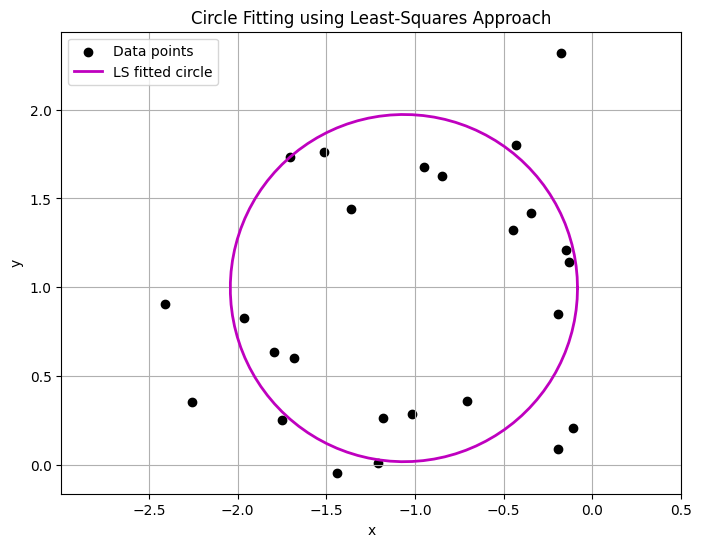

In [4]:
# Solve the least-squares problem
solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Extract the solution
y_star = solution[0]
c_ls_x = solution[1]
c_ls_y = solution[2]
c_ls = np.array([c_ls_x, c_ls_y])

# Calculate the radius
R_ls = np.sqrt(np.linalg.norm(c_ls)**2 - y_star)

print(f"LS Center: ({c_ls_x:.4f}, {c_ls_y:.4f})")
print(f"LS Radius: {R_ls:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot the fitted circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = c_ls_x + R_ls * np.cos(theta)
circle_y = c_ls_y + R_ls * np.sin(theta)
plt.plot(circle_x, circle_y, 'm-', linewidth=2, label='LS fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting using Least-Squares Approach')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()